In [1]:
pip install netCDF4

Note: you may need to restart the kernel to use updated packages.


In [10]:
import tarfile
from netCDF4 import Dataset
import os

# Define the path to the tar.gz file and the extraction directory
tar_gz_path = r"D:\Dom_Work\A_Work\Work\01_AIT\01_NASA's Land Information System (LIS)\example_output.tar.gz"
extraction_dir = r"D:\Dom_Work\A_Work\Work\01_AIT\01_NASA's Land Information System (LIS)"

In [12]:
for root, _, files in os.walk(extraction_dir):
  for filename in files:
    if filename == "LIS_HIST_202401010000.d01.nc":
      filepath = os.path.join(root, filename)
      # Process the file here (e.g., open, read, analyze)
      print("Processing:", filepath)

Processing: D:\Dom_Work\A_Work\Work\01_AIT\01_NASA's Land Information System (LIS)\ROUTING\202401\LIS_HIST_202401010000.d01.nc
Processing: D:\Dom_Work\A_Work\Work\01_AIT\01_NASA's Land Information System (LIS)\SURFACEMODEL\202401\LIS_HIST_202401010000.d01.nc
Processing: D:\Dom_Work\A_Work\Work\01_AIT\01_NASA's Land Information System (LIS)\SURFACEMODEL\ROUTING\202401\LIS_HIST_202401010000.d01.nc
Processing: D:\Dom_Work\A_Work\Work\01_AIT\01_NASA's Land Information System (LIS)\SURFACEMODEL\SURFACEMODEL\202401\LIS_HIST_202401010000.d01.nc


In [14]:
# Directory containing the NetCDF files
data_dir = r"D:\Dom_Work\A_Work\Work\01_AIT\01_NASA's Land Information System (LIS)\SURFACEMODEL"
data_routing_dir = r"D:\Dom_Work\A_Work\Work\01_AIT\01_NASA's Land Information System (LIS)\ROUTING"

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Iterate over files in the directory
for root, _, files in os.walk(data_dir):
  for filename in files:
    if filename.endswith('.nc'):
      filepath = os.path.join(root, filename)
      try:
        # Use 'r' mode to open in read-only to avoid potential permission issues
        nc_file = netCDF4.Dataset(filepath, 'r')  
        print(f"Successfully opened {filename}")
        
        # Read the 'SoilMoist_tavg' variable (replace with your desired variable)
        # Check if the variable exists before attempting to read it
        if 'SoilMoist_tavg' in nc_file.variables:
          sm = nc_file.variables['SoilMoist_tavg']

          # Extract the data for the first time step (adjust as needed)
          sm_data = sm[0,:,:]
          print(sm_data) # Print data after successful read
        else:
          print(f"'SoilMoist_tavg' variable not found in {filename}")

        nc_file.close()
      except OSError as e:
        print(f"Error opening {filename}: {e}")
      except Exception as e:
        print(f"An unexpected error occurred while processing {filename}: {e}")

Successfully opened LIS_HIST_201001020000.d01.nc
[[0.2016971  0.2012803  0.19979577 ... 0.19760507 0.1974824  0.19735408]
 [0.2006772  0.1997668  0.19909625 ... 0.19749063 0.19741082 0.19729769]
 [0.19954447 0.19982277 0.19865726 ... 0.19728415 0.19719975 0.19733416]
 ...
 [0.19790645 0.19798069 0.19793238 ... 0.20942764 0.20863527 0.20332398]
 [0.19798113 0.1980347  0.19806094 ... 0.20949852 0.20867378 0.20663314]
 [0.19801067 0.19807327 0.19813623 ... 0.21603246 0.20904982 0.20695068]]
Successfully opened LIS_HIST_201001030000.d01.nc
[[0.19799988 0.19768505 0.19647954 ... 0.19370048 0.19337898 0.19304325]
 [0.19774841 0.19601989 0.1954572  ... 0.19336547 0.19329506 0.1930701 ]
 [0.19644745 0.19670685 0.19482686 ... 0.1928401  0.19276714 0.19322304]
 ...
 [0.1952257  0.1953919  0.19521421 ... 0.22400154 0.22576123 0.21587099]
 [0.19539154 0.19555376 0.19560139 ... 0.22234868 0.22403757 0.22218566]
 [0.19548996 0.19563396 0.19573116 ... 0.23235299 0.22557372 0.22378148]]
Successfully o

In [16]:
import os
import xarray as xr
# Function to recursively find all .nc files in a directory
def find_nc_files(directory):
    nc_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.nc'):
                nc_files.append(os.path.join(root, file))
    return nc_files

In [18]:
# Find all .nc files in each directory
surface_files = find_nc_files(data_dir)
routing_files = find_nc_files(data_routing_dir)

# Check if files were found
print(f'Found {len(surface_files)} files in surfacemodel')
print(f'Found {len(routing_files)} files in routing')

# Load datasets
ds_surface = xr.open_mfdataset(surface_files, combine='by_coords')
ds_routing = xr.open_mfdataset(routing_files, combine='by_coords')

Found 15339 files in surfacemodel
Found 5113 files in routing


In [20]:
print(ds_surface)

<xarray.Dataset>
Dimensions:          (time: 5113, north_south: 36, east_west: 34,
                      SoilMoist_profiles: 4)
Coordinates:
  * time             (time) datetime64[ns] 2010-01-02 2010-01-03 ... 2024-01-01
Dimensions without coordinates: north_south, east_west, SoilMoist_profiles
Data variables:
    lat              (time, north_south, east_west) float32 dask.array<chunksize=(1, 36, 34), meta=np.ndarray>
    lon              (time, north_south, east_west) float32 dask.array<chunksize=(1, 36, 34), meta=np.ndarray>
    SoilMoist_tavg   (time, SoilMoist_profiles, north_south, east_west) float32 dask.array<chunksize=(1, 4, 36, 34), meta=np.ndarray>
    TWS_tavg         (time, north_south, east_west) float32 dask.array<chunksize=(1, 36, 34), meta=np.ndarray>
    Streamflow_tavg  (time, north_south, east_west) float32 dask.array<chunksize=(1, 36, 34), meta=np.ndarray>
Attributes: (12/15)
    missing_value:           -9999.0
    NUM_SOIL_LAYERS:         4
    SOIL_LAYER_THICKNE

In [22]:
# Calculate the average soil moisture over a period

# Extract the soil moisture data
soil_moisture = ds_surface['SoilMoist_tavg']

# Calculate the average soil moisture over time, across all profiles, and spatial dimensions
soil_moisture_avg = soil_moisture.mean(dim=['time', 'SoilMoist_profiles', 'north_south', 'east_west'])

# Print the result
print("Average Soil Moisture:", soil_moisture_avg.values)

Average Soil Moisture: 0.28944683


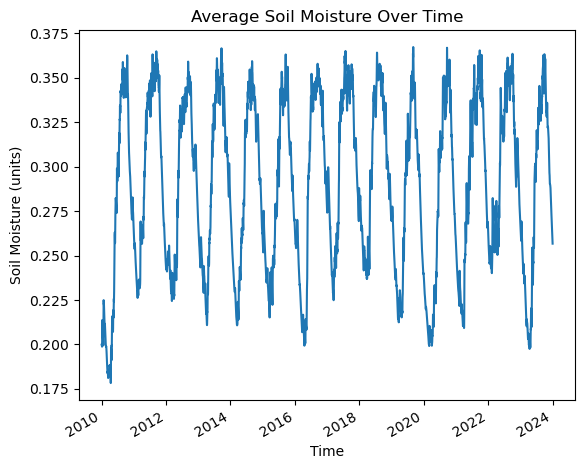

In [21]:
#Plot the Average Soil Moisture
import matplotlib.pyplot as plt

# Calculate the average soil moisture over time and plot it
soil_moisture_time_avg = soil_moisture.mean(dim=['SoilMoist_profiles', 'north_south', 'east_west'])

# Plot the time series of average soil moisture
soil_moisture_time_avg.plot()
plt.title('Average Soil Moisture Over Time')
plt.xlabel('Time')
plt.ylabel('Soil Moisture (units)')
plt.savefig('average_soil_moisture_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [69]:
# Save the averaged soil moisture data
soil_moisture_avg.to_netcdf('average_soil_moisture.nc')

<Figure size 640x480 with 0 Axes>

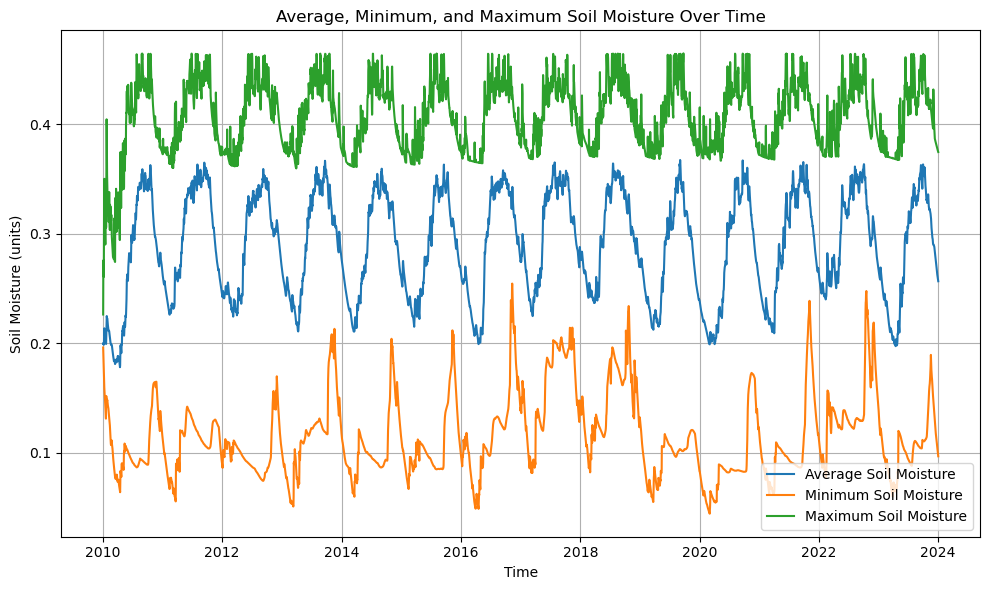

In [23]:
import matplotlib.pyplot as plt

# Calculate statistics
soil_moisture_time_avg = soil_moisture.mean(dim=['SoilMoist_profiles', 'north_south', 'east_west'])
soil_moisture_time_min = soil_moisture.min(dim=['SoilMoist_profiles', 'north_south', 'east_west'])
soil_moisture_time_max = soil_moisture.max(dim=['SoilMoist_profiles', 'north_south', 'east_west'])

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot average, minimum, and maximum soil moisture
plt.plot(soil_moisture_time_avg.time.values, soil_moisture_time_avg.values, label='Average Soil Moisture')
plt.plot(soil_moisture_time_avg.time.values, soil_moisture_time_min.values, label='Minimum Soil Moisture')
plt.plot(soil_moisture_time_avg.time.values, soil_moisture_time_max.values, label='Maximum Soil Moisture')

# Customize the plot
plt.title('Average, Minimum, and Maximum Soil Moisture Over Time')
plt.xlabel('Time')
plt.ylabel('Soil Moisture (units)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()  # Adjust layout for better readability

plt.savefig('time_soil_moisture_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [49]:
# Define a threshold for irrigation (adjust as needed)
irrigation_threshold = 0.2

# Determine areas that need irrigation
areas_needing_irrigation = avg_soil_moisture < irrigation_threshold

# Print results or further process the data
print("Average Soil Moisture:", avg_soil_moisture.values)
print("Areas Needing Irrigation:", areas_needing_irrigation.values)

ds_surface.close()  # Close the dataset after processing

Average Soil Moisture: [[0.20015095 0.19977085 0.19976558 0.19993366]
 [0.20090455 0.19950218 0.19943324 0.19984426]
 [0.19990343 0.1993083  0.19910268 0.1997471 ]
 ...
 [0.2245847  0.25369737 0.26716402 0.28852713]
 [0.22379407 0.2527883  0.26614106 0.28773782]
 [0.222663   0.25193122 0.26515326 0.2869631 ]]
Areas Needing Irrigation: [[False  True  True  True]
 [False  True  True  True]
 [ True  True  True  True]
 ...
 [False False False False]
 [False False False False]
 [False False False False]]


In [52]:
import xarray as xr
import pandas as pd
#TWS_tavg         (time, north_south, east_west) float32 dask.array<chunksize=(1, 36, 34), meta=np.ndarray>
#Streamflow_tavg  (time, north_south, east_west) float32 dask.array<chunksize=(1, 36, 34), meta=np.ndarray>

TWS  = ds_surface['TWS_tavg']
STR  = ds_surface['Streamflow_tavg']

In [54]:
# Convert to DataFrames
soil_moisture_df = soil_moisture.to_dataframe().reset_index()
tws_df = TWS.to_dataframe().reset_index()
streamflow_df = STR.to_dataframe().reset_index()

# Merge DataFrames
merged_df = pd.merge(soil_moisture_df, tws_df, on=['time', 'north_south', 'east_west'])
merged_df = pd.merge(merged_df, streamflow_df, on=['time', 'north_south', 'east_west'])

# Calculate correlation coefficients
correlation_soil_moisture_tws = merged_df['SoilMoist_tavg'].corr(merged_df['TWS_tavg'])
correlation_soil_moisture_streamflow = merged_df['SoilMoist_tavg'].corr(merged_df['Streamflow_tavg'])
correlation_tws_streamflow = merged_df['TWS_tavg'].corr(merged_df['Streamflow_tavg'])

print('Correlation between Soil Moisture and TWS:', correlation_soil_moisture_tws)
print('Correlation between Soil Moisture and Streamflow:', correlation_soil_moisture_streamflow)
print('Correlation between TWS and Streamflow:', correlation_tws_streamflow)

Correlation between Soil Moisture and TWS: 0.887620691567946
Correlation between Soil Moisture and Streamflow: 0.14613450958037294
Correlation between TWS and Streamflow: 0.19191500184336022


In [56]:
# Calculate correlations for each grid cell
correlation_soil_moisture_tws_grid = merged_df.groupby(['north_south', 'east_west'])[['SoilMoist_tavg', 'TWS_tavg']].corr()

# Calculate correlations for different time periods (e.g., monthly)
merged_df['month'] = merged_df['time'].dt.month
correlation_monthly = merged_df.groupby('month')[['SoilMoist_tavg', 'TWS_tavg', 'Streamflow_tavg']].corr()

# Calculate lagged correlations (adjust lag as needed)
lag = 1
merged_df['soil_moisture_lag'] = merged_df['SoilMoist_tavg'].shift(lag)
correlation_lagged = merged_df['soil_moisture_lag'].corr(merged_df['Streamflow_tavg'])

# Perform multiple regression
import statsmodels.api as sm
X = merged_df[['SoilMoist_tavg', 'TWS_tavg']]
y = merged_df['Streamflow_tavg']
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:        Streamflow_tavg   R-squared (uncentered):                     nan
Model:                            OLS   Adj. R-squared (uncentered):                nan
Method:                 Least Squares   F-statistic:                                nan
Date:                Fri, 23 Aug 2024   Prob (F-statistic):                         nan
Time:                        09:50:22   Log-Likelihood:                             nan
No. Observations:            25033248   AIC:                                        nan
Df Residuals:                25033246   BIC:                                        nan
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

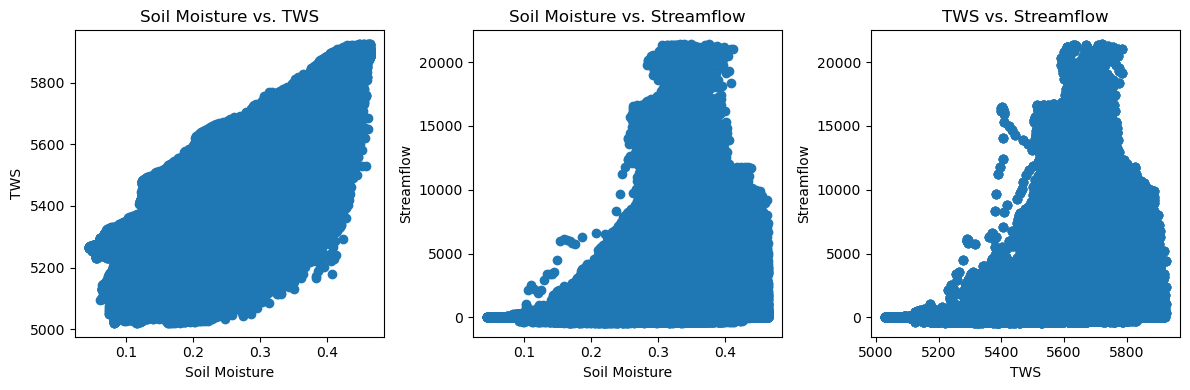

In [62]:
import matplotlib.pyplot as plt

# Create scatter plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(merged_df['SoilMoist_tavg'], merged_df['TWS_tavg'])
plt.xlabel('Soil Moisture')
plt.ylabel('TWS')
plt.title('Soil Moisture vs. TWS')

plt.subplot(1, 3, 2)
plt.scatter(merged_df['SoilMoist_tavg'], merged_df['Streamflow_tavg'])
plt.xlabel('Soil Moisture')
plt.ylabel('Streamflow')
plt.title('Soil Moisture vs. Streamflow')

plt.subplot(1, 3, 3)
plt.scatter(merged_df['TWS_tavg'], merged_df['Streamflow_tavg'])
plt.xlabel('TWS')
plt.ylabel('Streamflow')
plt.title('TWS vs. Streamflow')

plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19220\3751082822.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


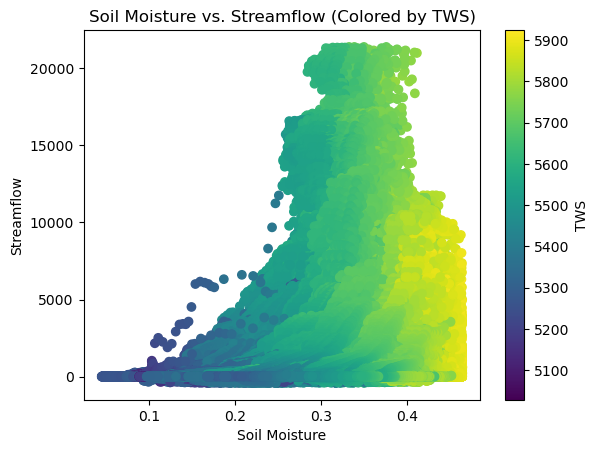

In [72]:
import matplotlib.pyplot as plt

# Assuming you have longitude and latitude data
#lon = merged_df['lon']
#lat = merged_df['lat']

# Create a colormap
cmap = plt.cm.get_cmap('viridis')

# Plot with colormap
plt.scatter(merged_df['SoilMoist_tavg'], merged_df['Streamflow_tavg'], c=merged_df['TWS_tavg'], cmap=cmap)
plt.colorbar(label='TWS')
plt.xlabel('Soil Moisture')
plt.ylabel('Streamflow')
plt.title('Soil Moisture vs. Streamflow (Colored by TWS)')
plt.show()